In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns


In [3]:
sns.set_style('darkgrid')

In [4]:
train_data=pd.read_excel('Data_Train.xlsx')


In [5]:
test_data=pd.read_excel('Test_set.xlsx')

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train_data.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
32h 20m      1
35h 35m      1
19h 50m      1
29h 10m      1
13h 35m      1
Name: Duration, Length: 368, dtype: int64

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.dropna(inplace=True)

In [12]:
test_data.dropna(inplace=True)

In [13]:
## EDA

In [14]:
train_data['journey_day']=pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [15]:
test_data['journey_day']=pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [16]:
train_data['journey_month']=pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [17]:
test_data['journey_day']=pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [18]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [19]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [20]:
test_data.drop('Date_of_Journey',axis=1,inplace=True)

In [21]:
train_data['dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour

In [22]:
test_data['dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour

In [23]:
train_data['dep_mins']=pd.to_datetime(train_data['Dep_Time']).dt.minute

In [24]:
test_data['dep_mins']=pd.to_datetime(test_data['Dep_Time']).dt.minute

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [26]:
train_data.drop('Dep_Time',axis=1,inplace=True)
test_data.drop('Dep_Time',axis=1,inplace=True)

In [27]:
train_data['Arrival_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
test_data['Arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour


In [28]:
train_data['Arrival_min']=pd.to_datetime(train_data['Arrival_Time']).dt.minute
test_data['Arrival_min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute


In [29]:
train_data.drop('Arrival_Time',axis=1,inplace=True)
test_data.drop('Arrival_Time',axis=1,inplace=True)

In [30]:
duration=list(train_data['Duration'])

In [31]:
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + ' 0m'
        else:
            duration[i]='0h ' + duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))


In [32]:
duration_test=list(test_data['Duration'])

In [33]:
for i in range(len(duration_test)):
    if len(duration_test[i].split()) !=2:
        if 'h' in duration_test[i]:
            duration_test[i]=duration_test[i].strip() + ' 0m'
        else:
            duration_test[i]='0h ' + duration_test[i]
duration_hours_test=[]
duration_mins_test=[]
for i in range(len(duration_test)):
    duration_hours_test.append(int(duration_test[i].split(sep='h')[0]))
    duration_mins_test.append(int(duration_test[i].split(sep='m')[0].split()[-1]))

In [34]:
train_data['duration_hours']=duration_hours
train_data['duration_min']=duration_mins

In [35]:
test_data['duration_hours']=duration_hours_test
test_data['duration_mins']=duration_mins_test

In [36]:
train_data.drop('Duration',axis=1,inplace=True)
test_data.drop('Duration',axis=1,inplace=True)

In [37]:
#Categorical Data

<AxesSubplot:>

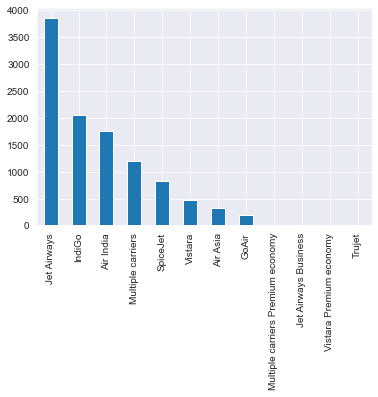

In [38]:
train_data['Airline'].value_counts().plot.bar()

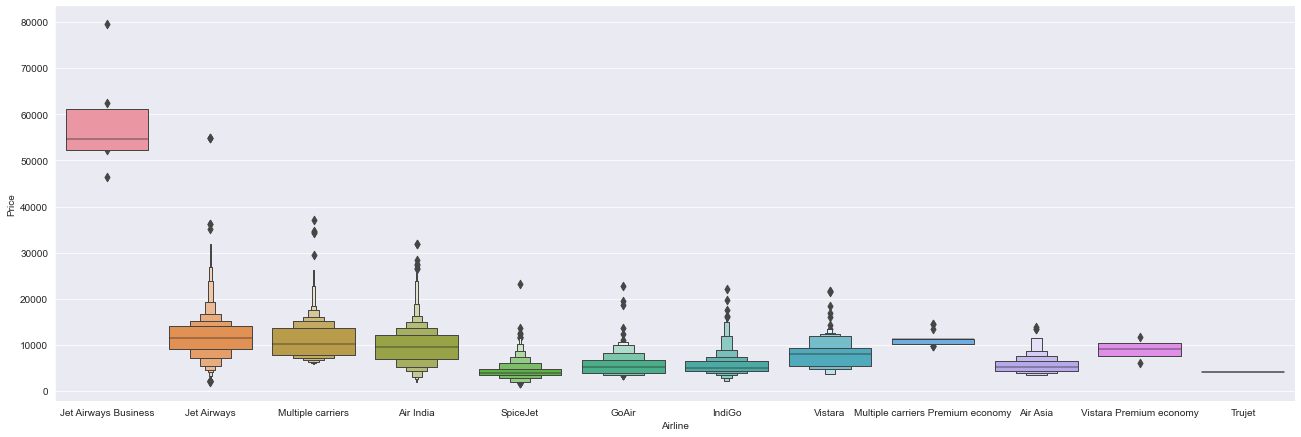

In [39]:
sns.catplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

In [40]:
airline=train_data[['Airline']]

In [41]:
airline=pd.get_dummies(airline,drop_first=True)

In [42]:
airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [43]:
places=train_data[['Source']]


In [44]:
places=pd.get_dummies(places,drop_first=True)

In [45]:
places

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [46]:
destination=train_data[['Destination']]


In [47]:
destination=pd.get_dummies(destination,drop_first=True)

In [48]:
destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [49]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [50]:
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [51]:
train_data.replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [52]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_mins,Arrival_hour,Arrival_min,duration_hours,duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [53]:
train_data=pd.concat([train_data,airline,places,destination],axis=1)

In [54]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_mins,Arrival_hour,Arrival_min,duration_hours,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
train_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [56]:
train_data.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_mins,Arrival_hour,Arrival_min,duration_hours,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
airline_test=test_data['Airline']

In [58]:
airline_test=pd.get_dummies(airline_test,drop_first=True)

In [59]:
Source_Destination=pd.get_dummies(test_data[['Source','Destination']],drop_first=True)

In [60]:
Source_Destination

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
2666,0,0,1,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0
2668,0,1,0,0,1,0,0,0,0
2669,0,1,0,0,1,0,0,0,0


In [61]:
test_data.replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [62]:
test_data=pd.concat([test_data,Source_Destination,airline],axis=1)

In [63]:
test_data.head()

,Airline,Source,Destination,Total_Stops,journey_day,dep_hour,dep_mins,Arrival_hour,Arrival_min,duration_hours,duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Jet Airways,Delhi,Cochin,1.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0
1,IndiGo,Kolkata,Banglore,1.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0
4,Air Asia,Banglore,Delhi,0.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0


In [64]:
test_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [65]:
test_data.head()

,Total_Stops,journey_day,dep_hour,dep_mins,Arrival_hour,Arrival_min,duration_hours,duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,1.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0
1,1.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0
2,1.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0
3,1.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0
4,0.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0


In [66]:
#Feature Selection

In [68]:
train_data.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_mins', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [71]:
X=train_data.loc[:,['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_mins', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [72]:
X

,Total_Stops,journey_day,journey_month,dep_hour,dep_mins,Arrival_hour,Arrival_min,duration_hours,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [73]:
Y=train_data.loc[:,'Price']

In [74]:
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

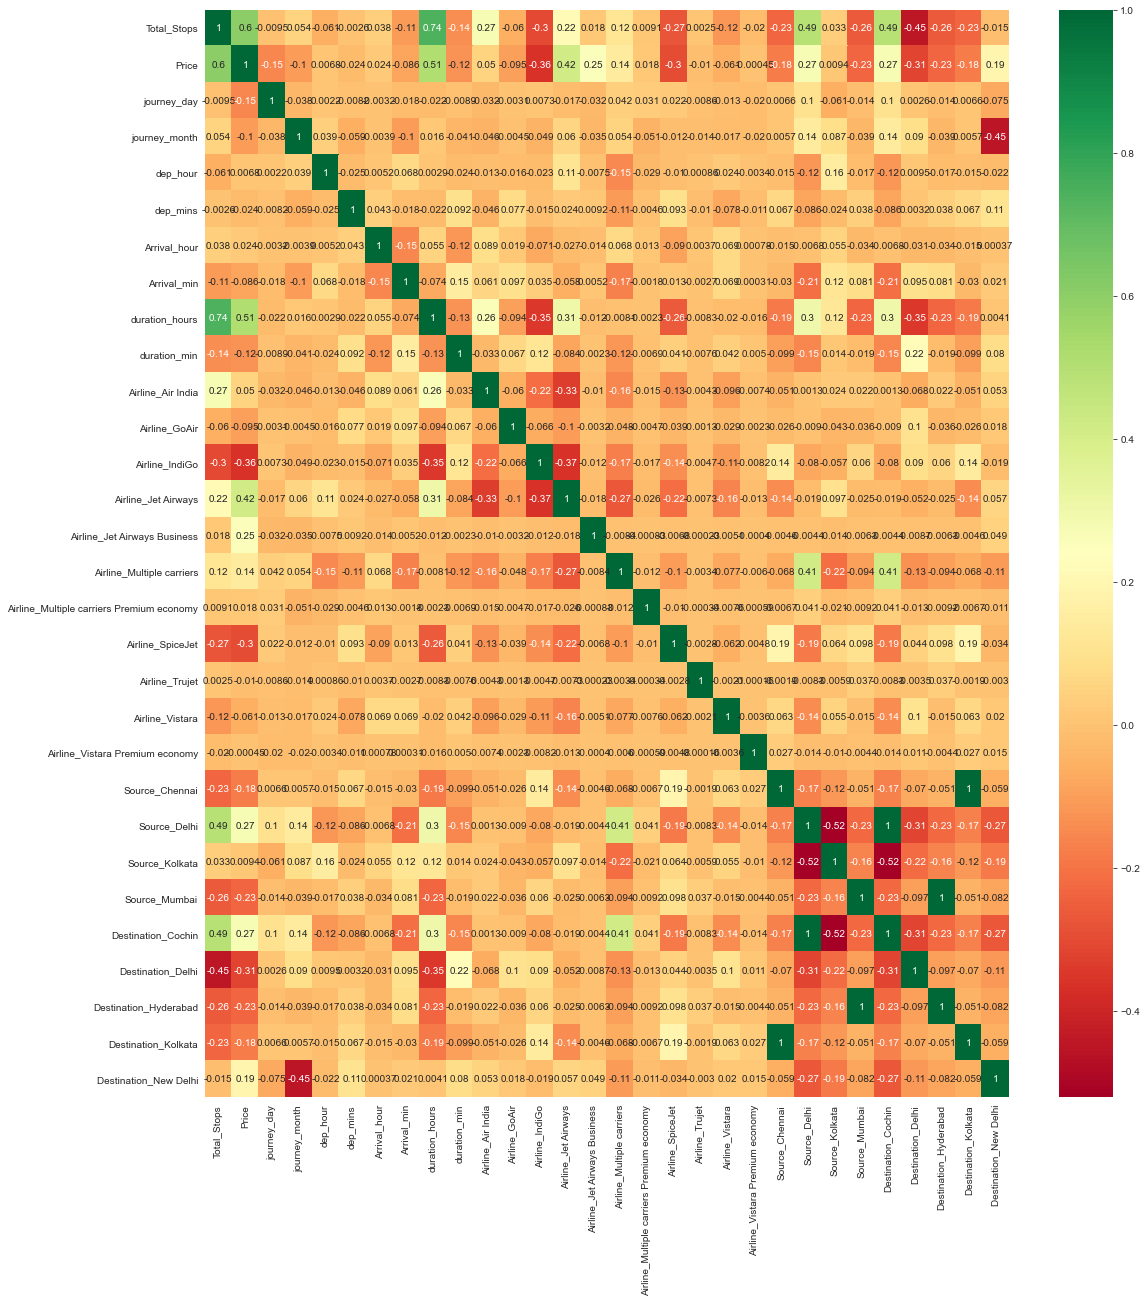

In [76]:
plt.figure(figsize=(18,20))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [77]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

In [78]:
selection.feature_importances_

array([2.26854584e-01, 1.42001790e-01, 5.52176536e-02, 2.41146142e-02,
       2.14631327e-02, 2.78316899e-02, 1.91972245e-02, 1.22862925e-01,
       1.79154216e-02, 1.00794889e-02, 2.21511520e-03, 1.80175743e-02,
       1.39149662e-01, 6.74478030e-02, 1.71146555e-02, 8.53328114e-04,
       3.40091462e-03, 1.01843072e-04, 5.15611813e-03, 8.61014231e-05,
       5.35297077e-04, 1.10253005e-02, 3.05147765e-03, 7.14947790e-03,
       1.26889277e-02, 1.36151822e-02, 5.46931619e-03, 4.87159612e-04,
       2.48962208e-02])

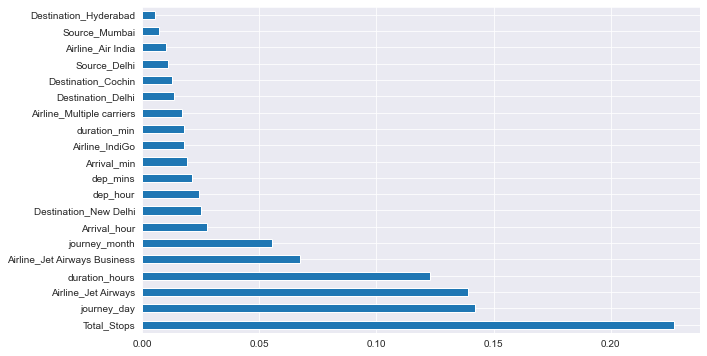

In [82]:
plt.figure(figsize=(10,6))
features=pd.Series(selection.feature_importances_,index=X.columns)
features.nlargest(20).plot(kind='barh')
plt.show()

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
rfr=RandomForestRegressor()

In [87]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [88]:
y_pred=rfr.predict(x_test)

In [89]:
rfr.score(x_train,y_train)

0.9571739997452594

In [90]:
rfr.score(x_test,y_test)

0.8137052463342495

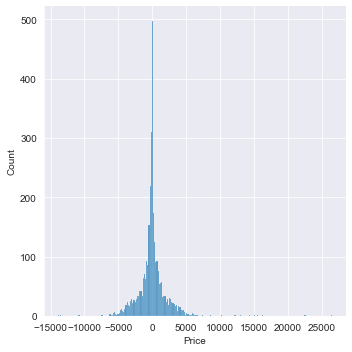

In [91]:
sns.displot(y_test-y_pred)
plt.show()

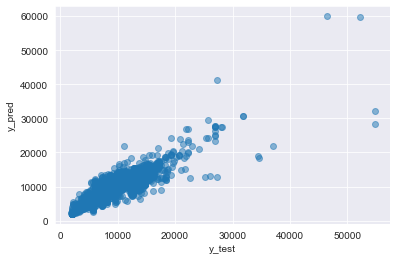

In [92]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [93]:
from sklearn import metrics

In [94]:
print('MAE',metrics.mean_absolute_error(y_pred,y_test))
print('mse',metrics.mean_squared_error(y_pred,y_test))

MAE 1207.5586574785762
mse 4022097.394376905


In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

In [97]:
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [98]:
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split=[5,10,12,15,30]
min_samples_leaf=[2,5,10,15]

In [99]:
parameters={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf}

In [100]:
rs=RandomizedSearchCV(estimator=rfr,param_distributions=parameters,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,n_jobs=-1)

In [102]:
rs.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   59.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 15],
                                        'min_samples_split': [5, 10, 12, 15,
                                                              30],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [103]:
rs.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=12,
                      n_estimators=600)

In [104]:
preds=rs.predict(x_test)

D:\Environment\flightware\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


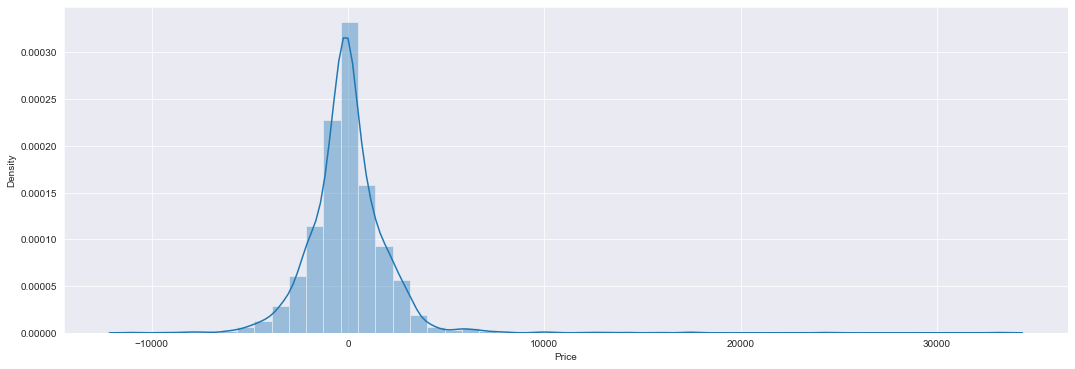

In [105]:
plt.figure(figsize=(18,6))
sns.distplot(y_test-preds)
plt.show()

In [106]:
import pickle

In [107]:
file=open('flighware.pkl','wb')

In [108]:
pickle.dump(rs,file)

In [109]:
model=open('flighware.pkl','rb')

m=pickle.load(model)

In [110]:
p=m.predict(x_test)

In [111]:
metrics.r2_score(y_test,p)

0.811099308712937